<a href="https://colab.research.google.com/github/AbuObaida01/Week-1/blob/main/WEEK1_SMART_ENERGY_CONSUMPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Energy Consumption


### **Problem Statement:**
This project will analyze how different household use their electricity by a dataset on kaggle. It will prepare data and foundational analysis for building an AI powered recommendation system that will tell you how you can optimize energy efficiency and reduce houshold energy cost.

### Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


print("Done")

Done


### Dataset Overview

Source: https://www.kaggle.com/datasets/samxsam/household-energy-consumption     
File: household_energy_consumption.csv

This kaggle dataset contains records of thousands of household

Like:

1.   House Hold ID
2.   Date

1.   Energy_consumption_kWh

2.   Household Size

1.   Avg_temperature_C
2.   Has AC

1.   Peak Hour Usage in kWh















In [13]:
df = pd.read_csv('household_energy_consumption.csv')
print("Dataset loaded: ", df.shape)
df.head()

Dataset loaded:  (90000, 7)


,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh
0,H00001,2025-04-01,8.4,4,17.8,No,3.2
1,H00001,2025-04-02,7.9,4,17.3,No,2.8
2,H00001,2025-04-03,9.2,4,18.6,No,3.0
3,H00001,2025-04-04,7.9,4,18.2,No,2.7
4,H00001,2025-04-05,9.6,4,11.9,No,3.2


### Inspecting the data structure

In [14]:
print("Dataset Info:")
df.info()

print("\nFirst rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Household_ID            90000 non-null  object 
 1   Date                    90000 non-null  object 
 2   Energy_Consumption_kWh  90000 non-null  float64
 3   Household_Size          90000 non-null  int64  
 4   Avg_Temperature_C       90000 non-null  float64
 5   Has_AC                  90000 non-null  object 
 6   Peak_Hours_Usage_kWh    90000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.8+ MB

First rows:
  Household_ID        Date  Energy_Consumption_kWh  Household_Size  \
0       H00001  2025-04-01                     8.4               4   
1       H00001  2025-04-02                     7.9               4   
2       H00001  2025-04-03                     9.2               4   
3       H00001  2025-04-04                    

### Checking For Missing Values

In [15]:
print("Missing values by column:")
print(df.isnull().sum())

Missing values by column:
Household_ID              0
Date                      0
Energy_Consumption_kWh    0
Household_Size            0
Avg_Temperature_C         0
Has_AC                    0
Peak_Hours_Usage_kWh      0
dtype: int64


### Basic Data Cleaning

In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(subset=['Date'], inplace=True)
if 'Has_AC' in df.columns:
    df['Has_AC'] = df['Has_AC'].map({'Yes': 1, 'No': 0})
if 'Avg_Temperature_C' in df.columns:
    temp_median = df['Avg_Temperature_C'].median()
    df['Avg_Temperature_C'] = df['Avg_Temperature_C'].fillna(temp_median)
if 'Household_Size' in df.columns:
    size_mode = df['Household_Size'].mode()[0]
    df['Household_Size'] = df['Household_Size'].fillna(size_mode)
print("Your Data Is Clean")

Your Data Is Clean


### Data Splitiing

In [17]:
df = df.sort_values('Date')
split_idx = int(0.8 * len(df))
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")
print(f"Train period: {train_df['Date'].min()} to {train_df['Date'].max()}")
print(f"Test period: {test_df['Date'].min()} to {test_df['Date'].max()}")

Train shape: (72000, 7), Test shape: (18000, 7)
Train period: 2025-04-01 00:00:00 to 2025-04-06 00:00:00
Test period: 2025-04-06 00:00:00 to 2025-04-08 00:00:00


### Extra Part (Data Visualization)

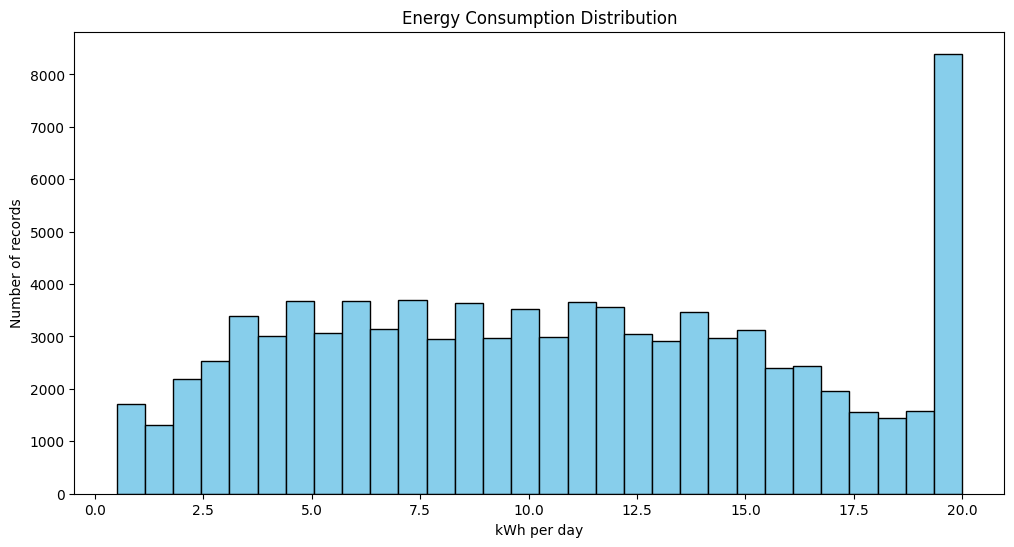

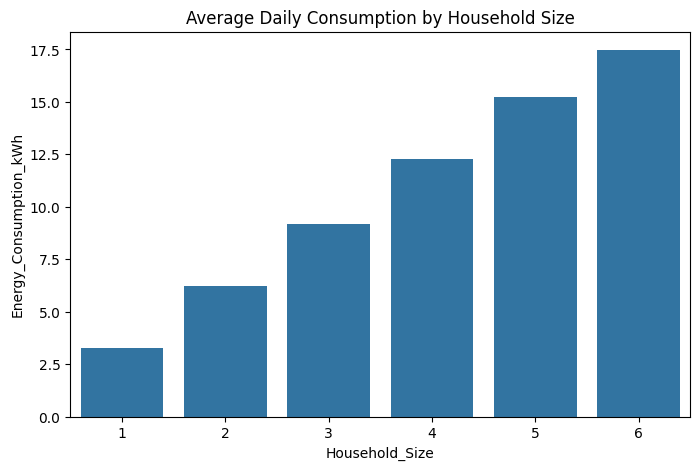

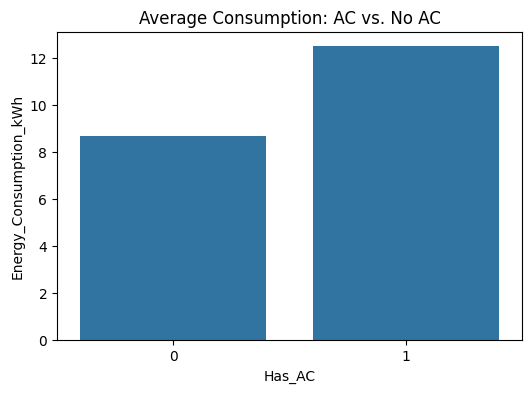

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(df['Energy_Consumption_kWh'], bins=30, color='skyblue', edgecolor='black')
plt.title('Energy Consumption Distribution')
plt.xlabel('kWh per day')
plt.ylabel('Number of records')
plt.show()

# Household size vs. average consumption
plt.figure(figsize=(8,5))
sns.barplot(x='Household_Size', y='Energy_Consumption_kWh', data=df, ci=None)
plt.title('Average Daily Consumption by Household Size')
plt.show()

# AC vs. non-AC
if 'Has_AC' in df.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Has_AC', y='Energy_Consumption_kWh', data=df, ci=None)
    plt.title('Average Consumption: AC vs. No AC')
    plt.show()